<a href="https://colab.research.google.com/github/YakshRathod/NULLCLASS-Internship/blob/Task-5/Task_5_Tokenizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Embeddings shape: (8, 768)


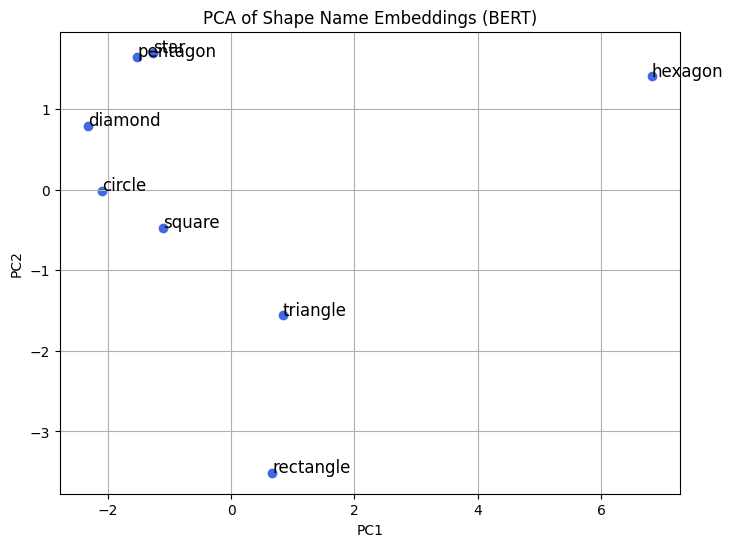

Saved embeddings to shape_label_embeddings.npy


In [1]:
from transformers import AutoTokenizer, AutoModel
import torch
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# --- Shape labels
shape_labels = ["circle", "square", "rectangle", "triangle", "star", "pentagon", "hexagon", "diamond"]

# --- Use BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

# --- Get mean-pooled embedding for each shape name
embeddings = []
for label in shape_labels:
    inputs = tokenizer(label, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
        emb = outputs.last_hidden_state.mean(dim=1).squeeze().numpy()  # mean pooling
        embeddings.append(emb)
embeddings = np.array(embeddings)  # shape: [num_labels, 768]

print("Embeddings shape:", embeddings.shape)

# --- Visualize with PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(embeddings)
plt.figure(figsize=(8,6))
plt.scatter(proj[:, 0], proj[:, 1], color='royalblue')
for i, label in enumerate(shape_labels):
    plt.annotate(label, (proj[i, 0], proj[i, 1]), fontsize=12)
plt.title("PCA of Shape Name Embeddings (BERT)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

np.save('/content/drive/MyDrive/Nullclass internship/Task 5', embeddings)
print("Saved embeddings to shape_label_embeddings.npy")

